In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Product_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Product_dataset.csv'

In [2]:
df.head()

,Category,SubCategory,Title,Original Price,Discount Price,Discount,Seller Name,Number of Ratings,Positive Seller Ratings,Ship On Time,Chat Response Rate,Delivery Type,Flagship Store,No. of products to be sold,Sell percentage to increase
0,"Watches, Bags, Jewellery",Kids Bags,Animal Prints Cotton Canvas Children Bags Back...,550,255,54.0,Twenty Twenty,342,85,0,98,Standard Delivery,No,107.84,116
1,"Watches, Bags, Jewellery",Kids Bags,School Bags For Girls Big Capacity Backpack Sh...,1650,725,56.0,AYSHA TRADERS,31,86,0,93,Free Delivery,No,113.79,128
2,"Watches, Bags, Jewellery",Kids Bags,Nylon Animal Children Backpacks Kids Preschool...,350,195,44.0,Shah Wholesale Fashion,13,77,0,57,Free Delivery,No,89.74,80
3,"Watches, Bags, Jewellery",Kids Bags,Backpacks for kids in kindergarten Cute baby b...,1200,749,38.0,Ghoredokanbd,23,93,0,100,Standard Delivery,No,80.11,61
4,"Watches, Bags, Jewellery",Kids Bags,kids bag toddler backpack with leash messenger...,350,286,18.0,Darun Online Shop,3,90,0,100,Free Delivery,No,61.19,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     12907 non-null  object 
 1   SubCategory                  12907 non-null  object 
 2   Title                        12907 non-null  object 
 3   Original Price               12907 non-null  int64  
 4   Discount Price               12907 non-null  int64  
 5   Discount                     12907 non-null  float64
 6   Seller Name                  12907 non-null  object 
 7   Number of Ratings            12907 non-null  int64  
 8   Positive Seller Ratings      12907 non-null  int64  
 9   Ship On Time                 12907 non-null  int64  
 10  Chat Response Rate           12907 non-null  int64  
 11  Delivery Type                12907 non-null  object 
 12  Flagship Store               12907 non-null  object 
 13  No. of products 

In [4]:
df.columns.tolist()

['Category',
 'SubCategory',
 'Title',
 'Original Price',
 'Discount Price',
 'Discount',
 'Seller Name',
 'Number of Ratings',
 'Positive Seller Ratings',
 'Ship On Time',
 'Chat Response Rate',
 'Delivery Type',
 'Flagship Store',
 'No. of products to be sold',
 'Sell percentage to increase']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     12907 non-null  object 
 1   SubCategory                  12907 non-null  object 
 2   Title                        12907 non-null  object 
 3   Original Price               12907 non-null  int64  
 4   Discount Price               12907 non-null  int64  
 5   Discount                     12907 non-null  float64
 6   Seller Name                  12907 non-null  object 
 7   Number of Ratings            12907 non-null  int64  
 8   Positive Seller Ratings      12907 non-null  int64  
 9   Ship On Time                 12907 non-null  int64  
 10  Chat Response Rate           12907 non-null  int64  
 11  Delivery Type                12907 non-null  object 
 12  Flagship Store               12907 non-null  object 
 13  No. of products 

In [7]:
df = df.drop(['Category',
 'SubCategory',
 'Title',
 'Seller Name',
 'Ship On Time',
 'Delivery Type',
 'Flagship Store']
, axis =1)

In [8]:
skew = df.skew()
print("\n skew \n", skew)

kurt = df.kurt()
print("\n kurtosis \n", kurt)


 skew 
 Original Price                  7.510341
Discount Price                  8.016985
Discount                        0.169055
Number of Ratings              13.318418
Positive Seller Ratings        -3.025517
Chat Response Rate             -3.003891
No. of products to be sold     15.121423
Sell percentage to increase    15.114969
dtype: float64

 kurtosis 
 Original Price                  86.196867
Discount Price                 102.392411
Discount                        -0.822103
Number of Ratings              322.262022
Positive Seller Ratings          7.791163
Chat Response Rate               8.720135
No. of products to be sold     583.378511
Sell percentage to increase    583.014508
dtype: float64


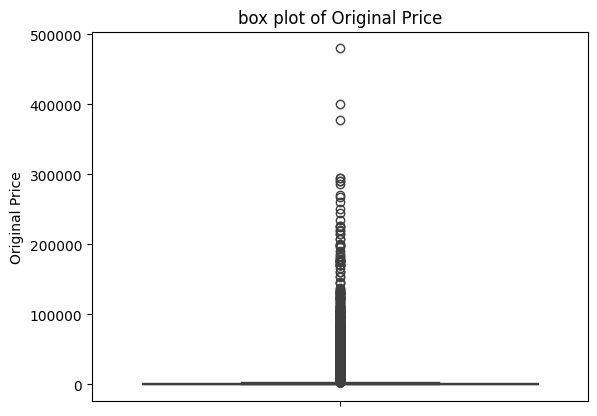

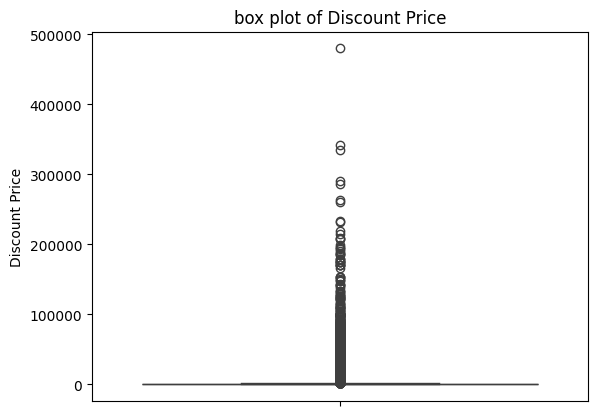

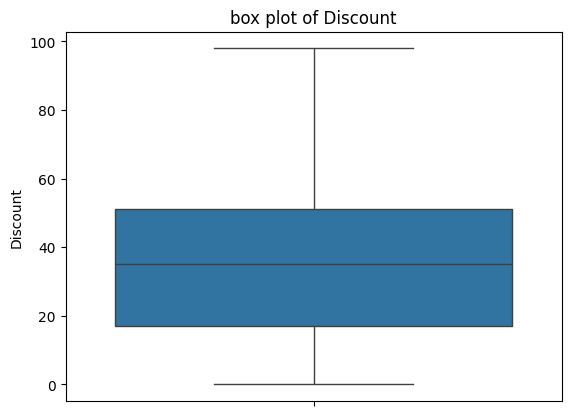

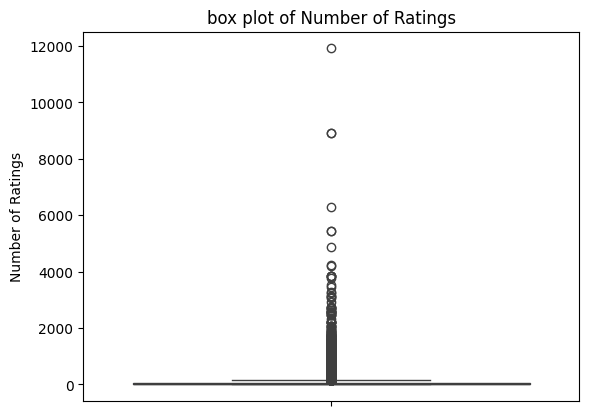

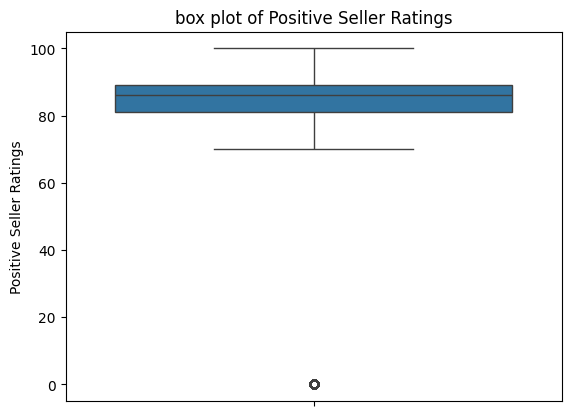

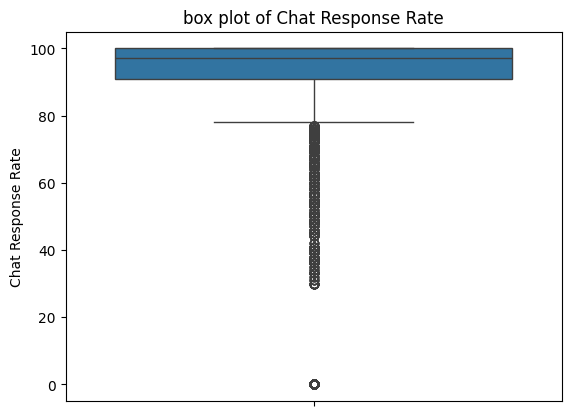

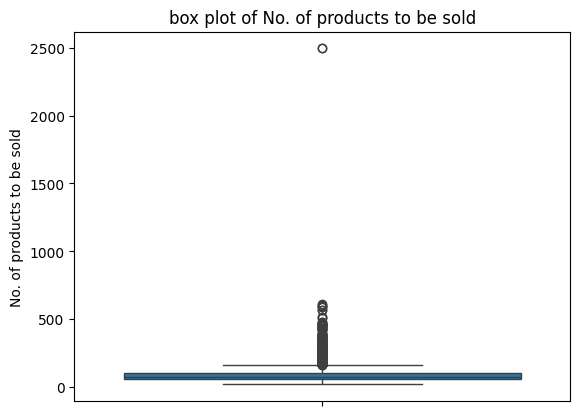

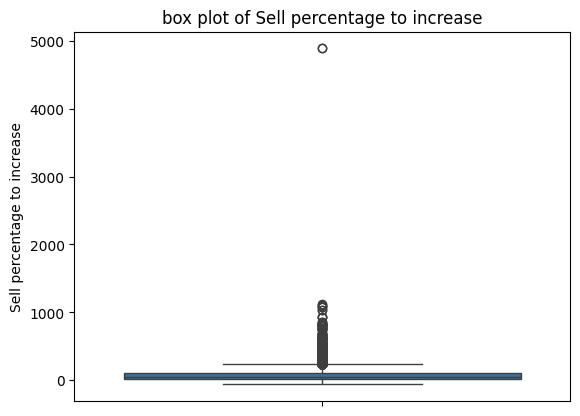

In [9]:
for column in df.columns:
    sns.boxplot(y=column, data = df)
    plt.title(f'box plot of {column}')
    plt.show()

<Figure size 640x480 with 0 Axes>

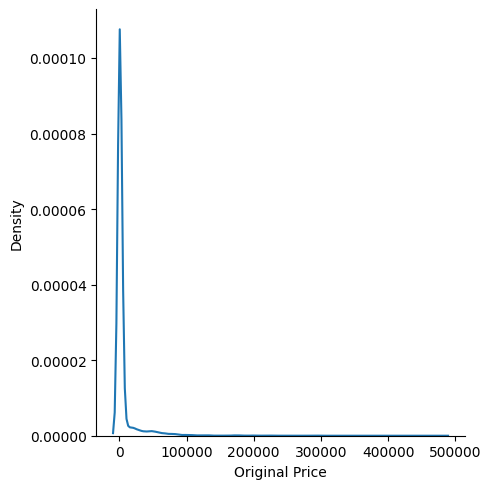

<Figure size 640x480 with 0 Axes>

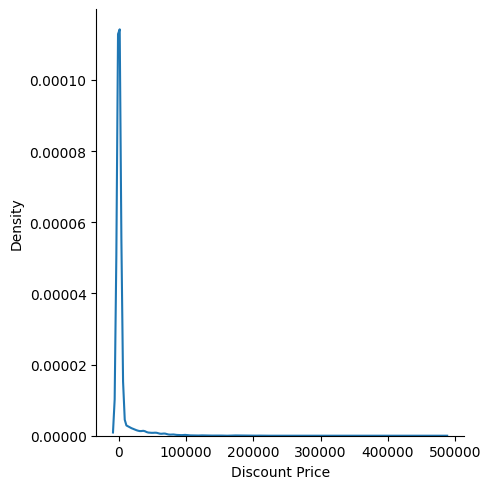

<Figure size 640x480 with 0 Axes>

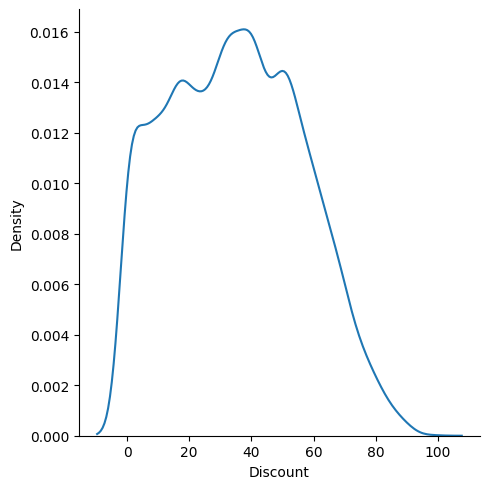

<Figure size 640x480 with 0 Axes>

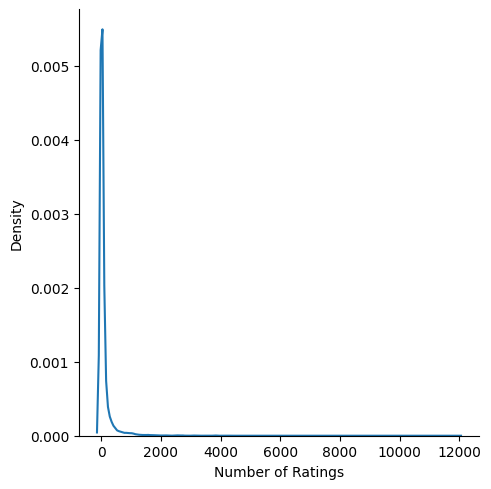

<Figure size 640x480 with 0 Axes>

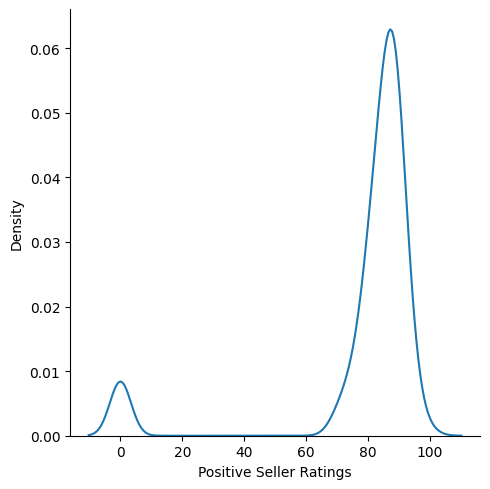

<Figure size 640x480 with 0 Axes>

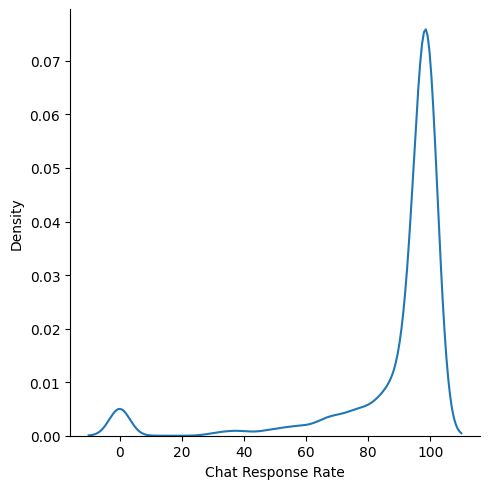

<Figure size 640x480 with 0 Axes>

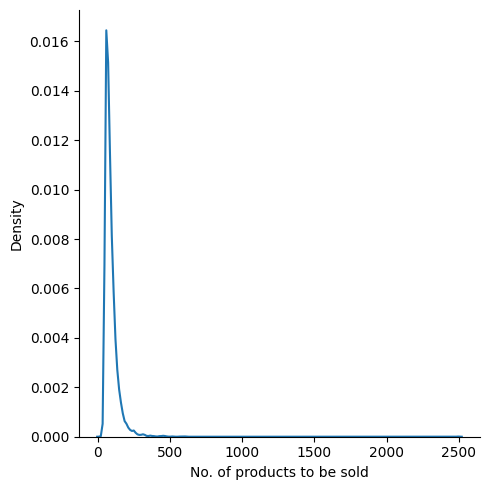

<Figure size 640x480 with 0 Axes>

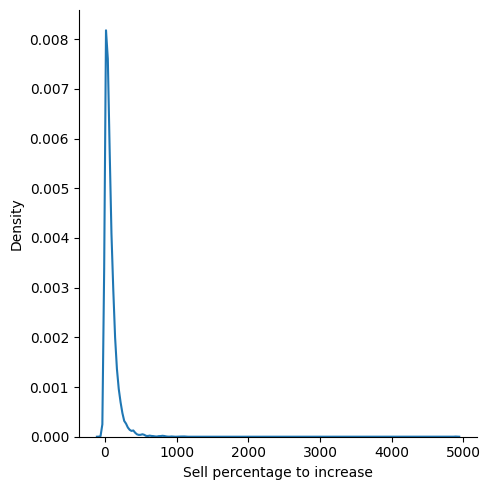

In [10]:
for columns in df.columns:
    plt.figure()
    sns.displot(df[columns],kind = 'kde')

In [11]:
from scipy.stats import zscore
print('Before outlier removal : ',df.shape)

z = np.abs(zscore(df, axis = 1))
threshold = 3

dataset = df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (12907, 8)
After Z-Score approach :  (12907, 8)


In [12]:
Q1 = dataset.quantile(0.25)  # Q1
Q3 = dataset.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)

After IQR approach :  (12907, 8)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12907 entries, 0 to 12906
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Original Price               12907 non-null  int64  
 1   Discount Price               12907 non-null  int64  
 2   Discount                     12907 non-null  float64
 3   Number of Ratings            12907 non-null  int64  
 4   Positive Seller Ratings      12907 non-null  int64  
 5   Chat Response Rate           12907 non-null  int64  
 6   No. of products to be sold   12907 non-null  float64
 7   Sell percentage to increase  12907 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 806.8 KB


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Original Price']])
scaled_df = pd.DataFrame(scaled_data, columns=['Original Price'])
scaled_df

,Original Price
0,0.001136
1,0.003428
2,0.000719
3,0.002490
4,0.000719
...,...
12902,0.000573
12903,0.000490
12904,0.000167
12905,0.000615


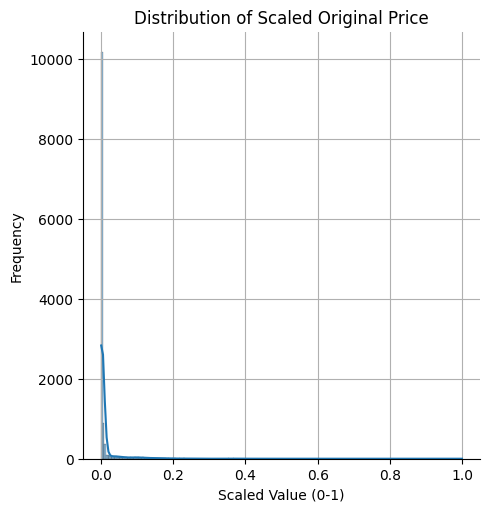

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Original Price', kde=True)

plt.title('Distribution of Scaled Original Price')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [23]:
df

,Original Price,Discount Price,Discount,Number of Ratings,Positive Seller Ratings,Chat Response Rate,No. of products to be sold,Sell percentage to increase
0,550,255,54.0,342,85,98,107.84,116
1,1650,725,56.0,31,86,93,113.79,128
2,350,195,44.0,13,77,57,89.74,80
3,1200,749,38.0,23,93,100,80.11,61
4,350,286,18.0,3,90,100,61.19,23
...,...,...,...,...,...,...,...,...
12902,280,216,23.0,14,88,100,64.81,30
12903,240,170,29.0,4,80,96,70.59,42
12904,85,85,0.0,7,89,0,50.00,0
12905,300,146,51.0,1,88,100,102.74,106


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Discount Price']])
scaled_df = pd.DataFrame(scaled_data, columns=['Discount Price'])
scaled_df


,Discount Price
0,0.000521
1,0.001500
2,0.000396
3,0.001550
4,0.000586
...,...
12902,0.000440
12903,0.000344
12904,0.000167
12905,0.000294


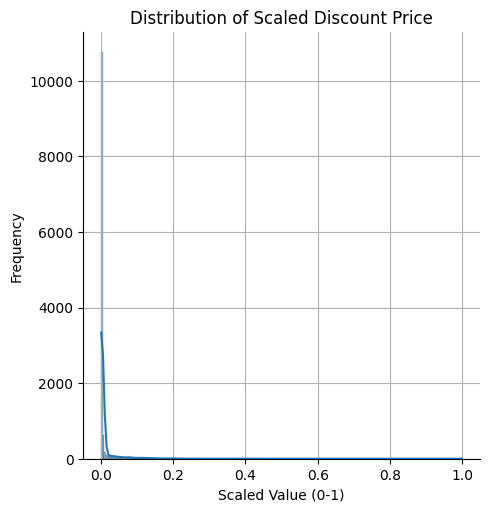

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Discount Price', kde=True)

plt.title('Distribution of Scaled Discount Price')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Discount']])
scaled_df = pd.DataFrame(scaled_data, columns=['Discount'])
scaled_df

,Discount
0,0.551020
1,0.571429
2,0.448980
3,0.387755
4,0.183673
...,...
12902,0.234694
12903,0.295918
12904,0.000000
12905,0.520408


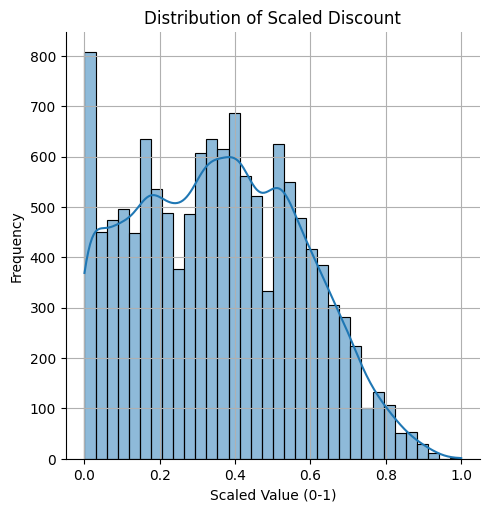

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Discount', kde=True)

plt.title('Distribution of Scaled Discount')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Number of Ratings']])
scaled_df = pd.DataFrame(scaled_data, columns=['Number of Ratings'])
scaled_df

,Number of Ratings
0,0.028706
1,0.002602
2,0.001091
3,0.001931
4,0.000252
...,...
12902,0.001175
12903,0.000336
12904,0.000588
12905,0.000084


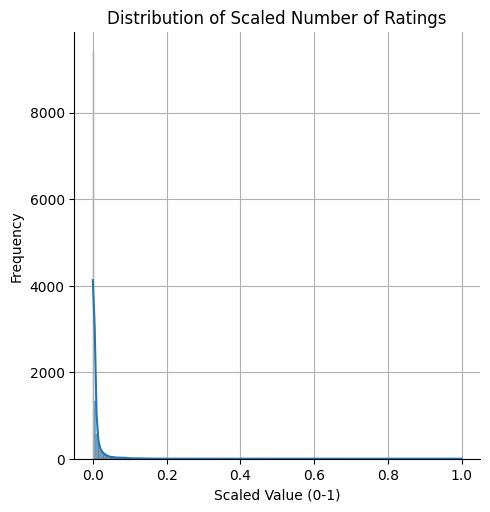

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Number of Ratings', kde=True)

plt.title('Distribution of Scaled Number of Ratings')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Positive Seller Ratings']])
scaled_df = pd.DataFrame(scaled_data, columns=['Positive Seller Ratings'])
scaled_df

,Positive Seller Ratings
0,0.85
1,0.86
2,0.77
3,0.93
4,0.90
...,...
12902,0.88
12903,0.80
12904,0.89
12905,0.88


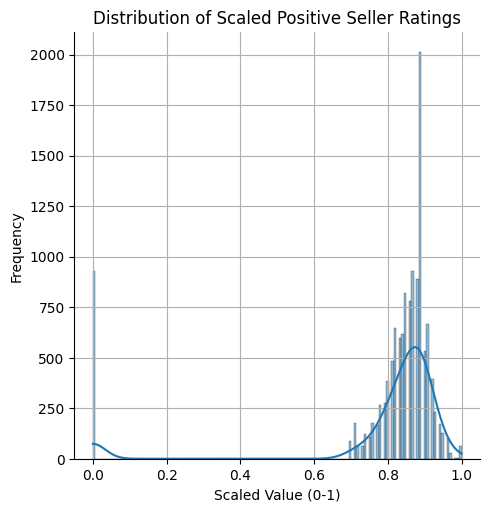

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Positive Seller Ratings', kde=True)

plt.title('Distribution of Scaled Positive Seller Ratings')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Positive Seller Ratings']])
scaled_df = pd.DataFrame(scaled_data, columns=['Positive Seller Ratings'])
scaled_df

,Positive Seller Ratings
0,0.85
1,0.86
2,0.77
3,0.93
4,0.90
...,...
12902,0.88
12903,0.80
12904,0.89
12905,0.88


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=scaled_df, x='Positive Seller Ratings', kde=True)

plt.title('Distribution of Scaled Positive Seller Ratings')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()